# Online tapping paradigm: isochronous tapping and beat syncrhonization to music

**Authors:   Manuel Anglada-Tort, Peter Harrison, Nori Jacoby**

This demo shows how to apply _REPP_ in SMS tapping experiemnts. We include two examples: (a) tapping to an isochronys stimulus (creating the audio stimulus on the fly) and (b) beat syncrhonization to music (loading the files from the input dir)


In [1]:
# Before starting, set the right working dir and imports
import os
if 'path_to_dir' not in globals():
    path_to_dir = os.path.split(os.getcwd())[0]
os.chdir(path_to_dir)

# working directories for input and output files
input_dir = "input"
output_dir = "output"

import matplotlib
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import platform
if platform.system() == "Linux":
    pass
else:
    matplotlib.use('agg')
%matplotlib inline

# Finally, import REPP configuration for SMS experiments
# Load experiment parameters from config file
from repp.config import sms_tapping


## Choose the tapping task
Choose one of the two tapping tasks:

    1. Beat syncrhonization task: IS_MUSIC = True
    2. Isocrhonus tapping: IS_MUSIC = False

In [2]:
IS_MUSIC = True

## 1 Stimulus preparation
We can now start with the first step: preparing the audio stimulus to be used with _REPP_

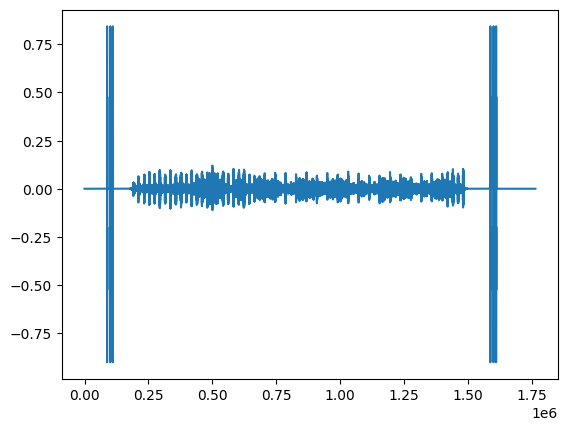

In [3]:
from repp.stimulus import REPPStimulus

if IS_MUSIC:
    stimulus = REPPStimulus("stim_music1", config = sms_tapping)
    stim_prepared, stim_info, filenames = stimulus.prepare_stim_from_files(input_dir)

else:
    stim_ioi = np.repeat(500, 10) # a stimulus defined by a list of ioi
    stimulus = REPPStimulus("iso_500ioi", config = sms_tapping)
    stim_onsets = stimulus.make_onsets_from_ioi(stim_ioi)
    stim_prepared, stim_info, filenames = stimulus.prepare_stim_from_onsets(stim_onsets)

plt.plot(stim_prepared)

# save stimulus info
REPPStimulus.to_json(
    stim_info,
    os.path.join(output_dir,filenames['stim_info_file'])
)

# save audio stimulus
REPPStimulus.to_wav(
    stim_prepared,
    os.path.join(output_dir,filenames['audio_filename']),
    stimulus.config.FS
)

## 2 Recording phase
**Instructions:**

    - Only use the laptop speakers (unplug headphones or wireless devices)
    - Turn on your volume
    - Tap on the surface of your laptop with your index finger (do not tap on any key or trackpad)

In [4]:
import sounddevice as sd

if IS_MUSIC:
    print("****RECORDING PHASE: Please tap in time to the music")
else:
    print("****RECORDING PHASE: Please tap in time to the metronome")

myrecording = sd.playrec(stim_prepared, stimulus.config.FS, channels=1)
sd.wait()  # Wait until recording is finished

# save recording to wav
REPPStimulus.to_wav(
    myrecording,
    os.path.join(output_dir,filenames['recording_filename']),
    stimulus.config.FS
)

****RECORDING PHASE: Please tap in time to the music


## 3 Analysis: signal processing and performance analysis

In [5]:
from repp.analysis import REPPAnalysis

analysis = REPPAnalysis(config = sms_tapping)

output, analysis, is_failed = analysis.do_analysis(
    stim_info,
    os.path.join(output_dir,filenames['recording_filename']),
    filenames['title_plot'],
    os.path.join(output_dir, filenames['plot_filename'])
)

Preparing initial onsets...
Extracting audio signals from mono recording...
reading audio file:
fs=44100 len(samples)=1764000
Extracting raw onsets from audio signals...
Aligning onsets...
Tapping analysis...
Analysing results...
Plot saved


<Figure size 2500x1050 with 0 Axes>

In [6]:
# mpl.rcParams['figure.dpi']= 600
# img = mpimg.imread(os.path.join(output_dir, filenames['plot_filename']))
# imgplot = plt.imshow(img)
# plt.axis('off')

(np.float64(-0.5), np.float64(7499.5), np.float64(3149.5), np.float64(-0.5))

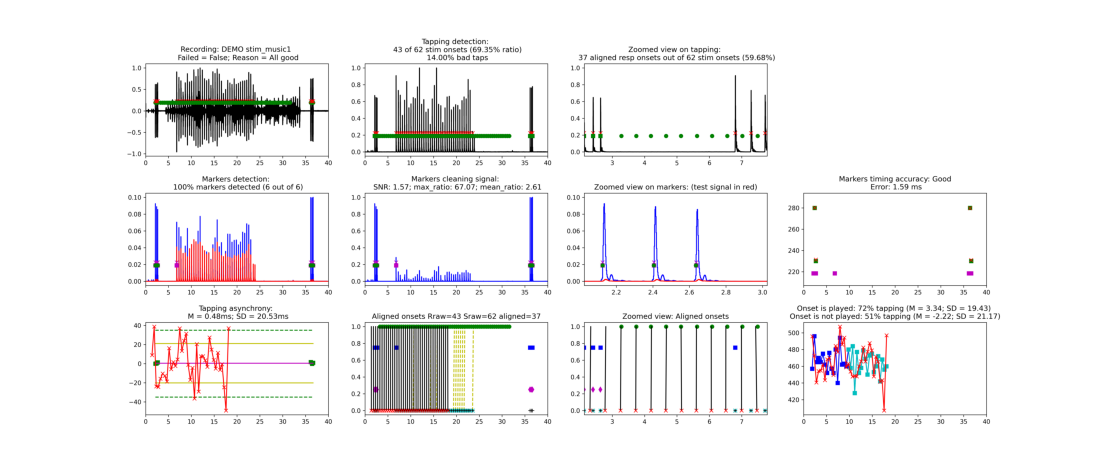

In [7]:
# and show the plot here
plt.figure(figsize=(14, 12))  # Adjust these numbers as needed
img = mpimg.imread(os.path.join(output_dir, filenames['plot_filename'])) #os.path.join(output_dir, filenames['plot_filename']))
imgplot = plt.imshow(img)
plt.axis('off')